In [96]:
import fastf1
from fastf1 import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings

warnings.filterwarnings("ignore")
plt.style.use('dark_background')

## Data

In [33]:
session = fastf1.get_session(2025,'Miami Grand Prix','Q')
session.load(laps=True, weather=True, telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data..

In [34]:
session.laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

## Analysis

In [39]:
q1, q2, q3 = session.laps.split_qualifying_sessions()

In [44]:
q2.pick_accurate().groupby('Driver').LapTime.min().sort_values()

Driver
PIA   0 days 00:01:26.269000
NOR   0 days 00:01:26.499000
RUS   0 days 00:01:26.575000
ANT   0 days 00:01:26.606000
VER   0 days 00:01:26.643000
SAI   0 days 00:01:26.847000
ALB   0 days 00:01:26.855000
LEC   0 days 00:01:26.948000
TSU   0 days 00:01:26.959000
OCO   0 days 00:01:26.967000
HAD   0 days 00:01:26.987000
HAM   0 days 00:01:27.006000
BOR   0 days 00:01:27.151000
DOO   0 days 00:01:27.186000
LAW   0 days 00:01:27.363000
Name: LapTime, dtype: timedelta64[ns]

In [93]:
oco = q2.pick_driver('HAM').pick_fastest().get_telemetry(frequency=12).add_distance()
ham = q2.pick_driver('OCO').pick_fastest().get_telemetry(frequency=12).add_distance()

In [94]:
print(oco.shape)
print(ham.shape)

(1046, 18)
(1046, 18)


In [98]:
t1 = q2.pick_driver('HAM').pick_fastest()
t2 = q2.pick_driver('OCO').pick_fastest()

In [119]:
delta_time, ref_tel, compare_tel = utils.delta_time(t1, t2) # For getting the delta time between two drivers

In [103]:
ref_tel

,Date,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,Distance
0,2025-05-03 20:42:41.870,0 days 00:41:21.843000,11439.149698,292.633334,7,99.0,False,12,interpolation,0 days 00:00:00,0.000000
1,2025-05-03 20:42:42.116,0 days 00:41:22.089000,10859.000000,294.000000,7,99.0,False,12,car,0 days 00:00:00.246000,20.090000
2,2025-05-03 20:42:42.436,0 days 00:41:22.409000,10641.000000,298.000000,8,99.0,False,12,car,0 days 00:00:00.566000,46.578889
3,2025-05-03 20:42:42.636,0 days 00:41:22.609000,10719.000000,301.000000,8,99.0,False,12,car,0 days 00:00:00.766000,63.301111
4,2025-05-03 20:42:42.837,0 days 00:41:22.810000,10817.000000,303.000000,8,99.0,False,12,car,0 days 00:00:00.967000,80.218611
...,...,...,...,...,...,...,...,...,...,...,...
326,2025-05-03 20:44:07.957,0 days 00:42:47.930000,11415.000000,283.000000,7,99.0,False,12,car,0 days 00:01:26.087000,5269.759167
327,2025-05-03 20:44:08.197,0 days 00:42:48.170000,11417.000000,284.000000,7,99.0,False,12,car,0 days 00:01:26.327000,5288.692500
328,2025-05-03 20:44:08.518,0 days 00:42:48.491000,11523.000000,289.000000,7,98.0,False,12,car,0 days 00:01:26.648000,5314.461667
329,2025-05-03 20:44:08.717,0 days 00:42:48.690000,11658.000000,291.000000,7,98.0,False,12,car,0 days 00:01:26.847000,5330.547500


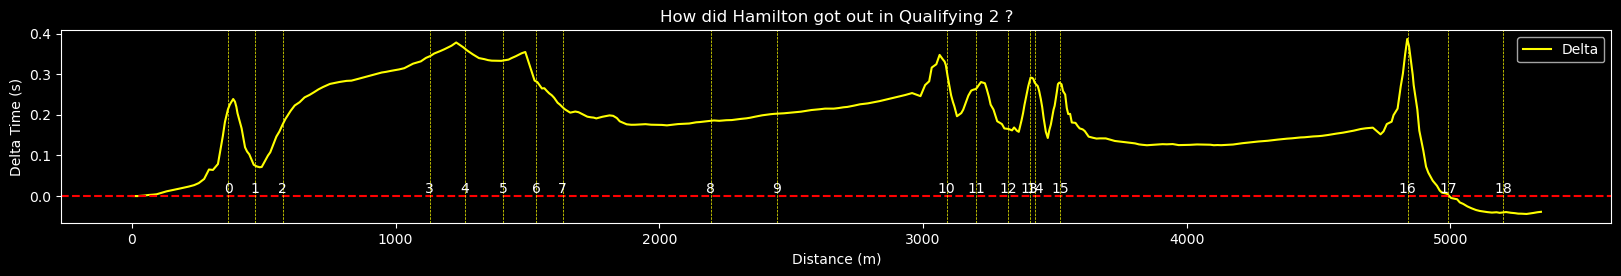

In [118]:
fig,ax = plt.subplots(1, 1, figsize=(20, 2.5))
plt.plot(ref_tel['Distance'], delta_time, label='Delta', color='yellow')
plt.axhline(0, color='red', xmin=0, xmax=1, linestyle='--')
for corner_index in range(len(session.get_circuit_info().corners)):
    ax.axvline(x=session.get_circuit_info().corners['Distance'][corner_index], color='yellow', linestyle='--', linewidth=0.5)
    ax.text(session.get_circuit_info().corners['Distance'][corner_index], 0, f'{corner_index}', ha='center', va='bottom')

plt.title('How did Hamilton got out in Qualifying 2 ?')
plt.xlabel('Distance (m)')
plt.ylabel('Delta Time (s)')
plt.legend()

## Verstappen Mega Lap

In [133]:
ver = q3.pick_driver('VER').pick_fastest().get_telemetry(frequency=12).add_distance()
pia = q3.pick_driver('PIA').pick_fastest().get_telemetry(frequency=12).add_distance()
nor = q3.pick_driver('NOR').pick_fastest().get_telemetry(frequency=12).add_distance()

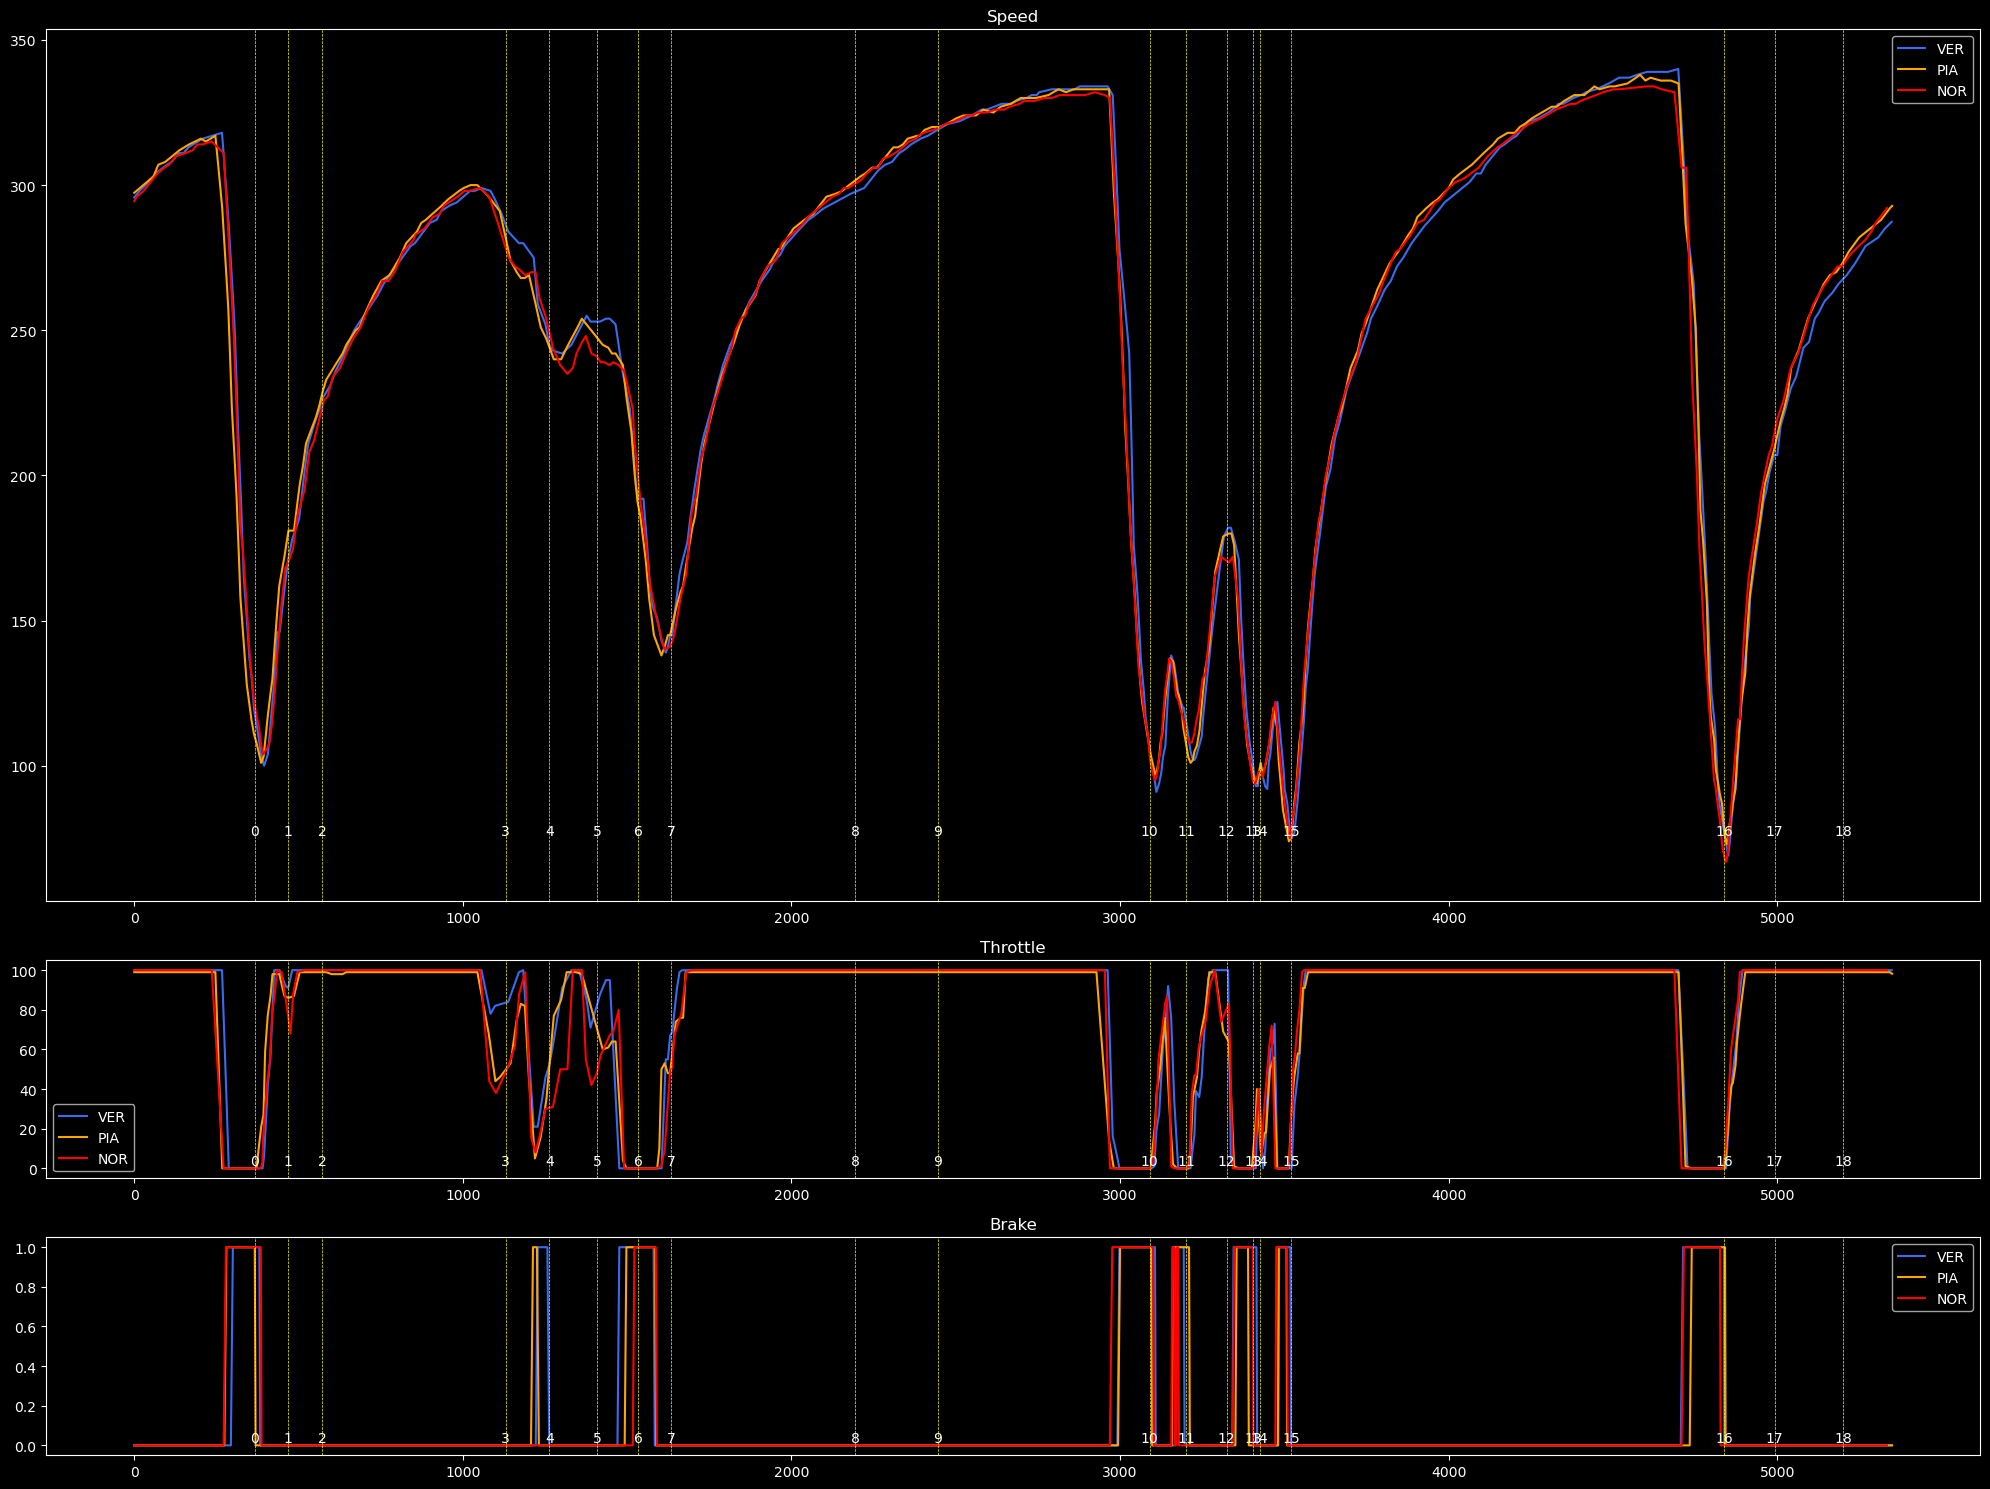

In [138]:
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 0.25, 0.25])  # Define grid with different heights

# Speed Plot
ax0 = fig.add_subplot(gs[0])
ax0.plot(ver['Distance'], ver['Speed'], label='VER', color='#396bf0')
ax0.plot(pia['Distance'], pia['Speed'], label='PIA', color='orange')
ax0.plot(nor['Distance'], nor['Speed'], label='NOR', color='red')
for corner_index in range(len(session.get_circuit_info().corners)):
    ax0.axvline(x=session.get_circuit_info().corners['Distance'][corner_index], color='yellow', linestyle='--', linewidth=0.5)
    ax0.text(session.get_circuit_info().corners['Distance'][corner_index], 75, f'{corner_index}', ha='center', va='bottom')
ax0.legend()
ax0.set_title("Speed")

# Throttle Plot
ax1 = fig.add_subplot(gs[1])
ax1.plot(ver['Distance'], ver['Throttle'], label='VER', color='#396bf0')
ax1.plot(pia['Distance'], pia['Throttle'], label='PIA', color='orange')
ax1.plot(nor['Distance'], nor['Throttle'], label='NOR', color='red')
for corner_index in range(len(session.get_circuit_info().corners)):
    ax1.axvline(x=session.get_circuit_info().corners['Distance'][corner_index], color='yellow', linestyle='--', linewidth=0.5)
    ax1.text(session.get_circuit_info().corners['Distance'][corner_index], 0, f'{corner_index}', ha='center', va='bottom')
ax1.legend()
ax1.set_title("Throttle")

# Brake Plot
ax1 = fig.add_subplot(gs[2])
ax1.plot(ver['Distance'], ver['Brake'], label='VER', color='#396bf0')
ax1.plot(pia['Distance'], pia['Brake'], label='PIA', color='orange')
ax1.plot(nor['Distance'], nor['Brake'], label='NOR', color='red')
for corner_index in range(len(session.get_circuit_info().corners)):
    ax1.axvline(x=session.get_circuit_info().corners['Distance'][corner_index], color='yellow', linestyle='--', linewidth=0.5)
    ax1.text(session.get_circuit_info().corners['Distance'][corner_index], 0, f'{corner_index}', ha='center', va='bottom')
ax1.legend()
ax1.set_title("Brake")

plt.tight_layout()
plt.show()

In [ ]:
# Redbull have brought a new floor for Verstappen in Miami. It seems to be working well considering VER was able to be more on throttle as compared to PIA and NOR especially in fast corner (Turn 3,5). Clearly he looks to be the favourite for the win

### Car Setups

In [139]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:17:33.322000,PIA,81,NaT,1.0,1.0,0 days 00:15:35.266000,NaT,NaT,0 days 00:00:43.541000,...,False,McLaren,0 days 00:15:35.266000,2025-05-03 20:16:55.293,1,NaN,False,,False,False
1,0 days 00:19:00.629000,PIA,81,0 days 00:01:27.307000,2.0,1.0,NaT,NaT,0 days 00:00:28.902000,0 days 00:00:33.467000,...,False,McLaren,0 days 00:17:33.322000,2025-05-03 20:18:53.349,1,NaN,False,,False,True
2,0 days 00:20:53.058000,PIA,81,0 days 00:01:52.429000,3.0,1.0,NaT,0 days 00:20:48.023000,0 days 00:00:36.920000,0 days 00:00:39.524000,...,False,McLaren,0 days 00:19:00.629000,2025-05-03 20:20:20.656,1,NaN,False,,False,False
3,0 days 00:24:59.279000,PIA,81,NaT,4.0,2.0,0 days 00:22:54.511000,NaT,NaT,0 days 00:00:38.772000,...,True,McLaren,0 days 00:20:53.058000,2025-05-03 20:22:13.085,1,NaN,False,,False,False
4,0 days 00:26:26.285000,PIA,81,0 days 00:01:27.006000,5.0,2.0,NaT,NaT,0 days 00:00:28.671000,0 days 00:00:33.468000,...,True,McLaren,0 days 00:24:59.279000,2025-05-03 20:26:19.306,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0 days 00:23:33.781000,STR,18,0 days 00:01:28.264000,5.0,2.0,NaT,NaT,0 days 00:00:29.347000,0 days 00:00:33.984000,...,True,Aston Martin,0 days 00:22:05.517000,2025-05-03 20:23:25.544,1,NaN,False,,False,True
310,0 days 00:25:26.784000,STR,18,0 days 00:01:53.003000,6.0,2.0,NaT,0 days 00:25:20.294000,0 days 00:00:36.598000,0 days 00:00:41.407000,...,True,Aston Martin,0 days 00:23:33.781000,2025-05-03 20:24:53.808,1,NaN,False,,False,False
311,0 days 00:30:00.714000,STR,18,NaT,7.0,3.0,0 days 00:27:52.692000,NaT,NaT,0 days 00:00:42.530000,...,False,Aston Martin,0 days 00:25:26.784000,2025-05-03 20:26:46.811,1,NaN,False,,False,False
312,0 days 00:31:28.544000,STR,18,0 days 00:01:27.830000,8.0,3.0,NaT,NaT,0 days 00:00:29.106000,0 days 00:00:33.837000,...,False,Aston Martin,0 days 00:30:00.714000,2025-05-03 20:31:20.741,1,NaN,False,,False,True
